##Carga del Dataset Diamonds

In [ ]:
pip install pandas


In [ ]:
pip install scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



from scipy.stats import skew,kurtosis
import pickle as pkl

In [2]:
print(f"pandas={np.__version__}")

pandas=2.2.0


## Carganos el Csv

In [3]:
df = pd.read_csv("/users/varso/MODULO3/DataFrame/diamonds.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


## Busqueda de NAN's

* Realizo la busqueda de los Nans por columnas con .isnull() y .isna()

In [5]:
df.isnull().sum()

carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64

In [6]:
df.isna().sum()

carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64

In [7]:
duplicate = df.duplicated().sum()

# Limpieza de nulos | Tratamiento de nulos 

* Rellenar Nulos por columna con mediana

In [8]:
df.replace("?",np.nan,inplace=True)

In [9]:
df["carat"]=df["carat"].astype("float32")

In [10]:
df[["price","x"]]=df[["price","x"]].astype(float)

In [11]:
df["cut"]=df["cut"].astype("category")
print(df.dtypes)

carat       float32
cut        category
color        object
clarity      object
depth       float64
table       float64
price       float64
x           float64
y           float64
z           float64
dtype: object


In [12]:

df['carat'] = df['carat'].fillna(df['carat'].median())
df['table'] = df['table'].fillna(df['table'].median())
df['y'] = df['y'].fillna(df['y'].median())
df['z'] = df['z'].fillna(df['z'].median())
df['price'] = df['price'].fillna(df['price'].median())
df['x'] = df['x'].fillna(df['x'].median())



* Rellenar datos con la moda la columna Cut, color, clarity al ser datos de tipo Str

In [13]:
# Encontrar la moda
moda = df['cut'].mode()[0]

# Rellenar con la moda
df['cut'] = df['cut'].fillna(moda)

print(df)

       carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53940 rows x 10 columns]


In [14]:
# Encontrar la moda
moda = df['color'].mode()[0]

# Rellenar con la moda
df['color'] = df['color'].fillna(moda)

print(df)

       carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53940 rows x 10 columns]


In [15]:
# Encontrar la moda
moda = df['clarity'].mode()[0]

# Rellenar con la moda
df['clarity'] = df['clarity'].fillna(moda)

print(df)

       carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53940 rows x 10 columns]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float32 
 1   cut      53940 non-null  category
 2   color    53940 non-null  object  
 3   clarity  53940 non-null  object  
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float64 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(1), float32(1), float64(6), object(2)
memory usage: 3.5+ MB


# Limpieza del DataFrame de Nan's y errores

In [17]:

df.isna().sum()



carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Codificación: Uso de la función get-dummies y de map

* Encoding con get_dummies genera columnas nuevas y las rellena con 0 y 1

In [18]:

df_encoded = pd.get_dummies(df)
df_encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


* Encoding con .map(), de las columna carat, cut, color, clarity

In [19]:
df[['cut']].value_counts()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [20]:
mapeo_cut = {
    "Ideal" : 1,
    "Premium" : 2,
    "Very Good" : 3,
    "Good" : 4,
    "Fair" : 5
}

df["cut"] = df["cut"].map(mapeo_cut)
df["cut"] = df["cut"].astype(int)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,2,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,4,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Creación de una columna nueva  llamada price.iva 

In [21]:
# Crear columna price.iva desde la columna price

df["price"]



0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53940, dtype: float64

* Creación de la coloumna price.iva
* Calculo del IVA de la columna price

In [22]:

iva_rate = 0.21  # Tasa del IVA (21%)
df['price.iva'] = df['price'] * (1 + iva_rate)

df['price.iva'] = df['price'] * iva_rate

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price.iva
0,0.23,1,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,68.46
1,0.21,2,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,68.46
2,0.23,4,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,68.67
3,0.29,2,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,70.14
4,0.31,4,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,70.35


In [23]:
df["total_suma_iva"] = df["price"] * 1.21
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price.iva,total_suma_iva
0,0.23,1,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,68.46,394.46
1,0.21,2,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,68.46,394.46
2,0.23,4,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,68.67,395.67
3,0.29,2,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,70.14,404.14
4,0.31,4,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,70.35,405.35


* Ordenación de columnas

In [24]:
df.columns
position = df.columns.get_loc("price")

In [25]:
serie_iva = df.pop("price.iva")

df.insert(position,"price.iva",serie_iva)


serie_iva = df.pop("total_suma_iva")

df.insert(position,"total_suma_iva",serie_iva)

In [26]:
df.head(3)

,carat,cut,color,clarity,depth,table,total_suma_iva,price.iva,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,394.46,68.46,326.0,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,394.46,68.46,326.0,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,395.67,68.67,327.0,4.05,4.07,2.31


# Crear descuentos del 10% y 15%

In [27]:
def calcular_descuento(row):
    
    if row["price"] < 1000 and row["cut"] == 1:
        return row["price"] * 0.9 # Descuento del 10%
    elif 1000 <= row["price"] <= 5000 and row["cut"] == 2:
        return row["price"] * 0.85 # Descuento del 15%
    else:
        return row["price"]

In [28]:
# Usar apply para crear la columna `price_discount`
df['price_discount'] = df.apply(calcular_descuento, axis=1)

print("DataFrame con precio original y descuento:")
print(df)

DataFrame con precio original y descuento:
       carat  cut color clarity  depth  table  total_suma_iva  price.iva  \
0       0.23    1     E     SI2   61.5   55.0          394.46      68.46   
1       0.21    2     E     SI1   59.8   61.0          394.46      68.46   
2       0.23    4     E     VS1   56.9   65.0          395.67      68.67   
3       0.29    2     I     VS2   62.4   58.0          404.14      70.14   
4       0.31    4     J     SI2   63.3   58.0          405.35      70.35   
...      ...  ...   ...     ...    ...    ...             ...        ...   
53935   0.72    1     D     SI1   60.8   57.0         3335.97     578.97   
53936   0.72    4     D     SI1   63.1   55.0         3335.97     578.97   
53937   0.70    3     D     SI1   62.8   60.0         3335.97     578.97   
53938   0.86    2     H     SI2   61.0   58.0         3335.97     578.97   
53939   0.75    1     D     SI2   62.2   55.0         3335.97     578.97   

        price     x     y     z  price_disco

## Creación de un nuevo volumen con las columnas X, Y, Z

In [29]:
# Crear la nueva columna 'volumen' como el producto de x, y, y z
df['volumen'] = df['x'] * df['y'] * df['z']
df.head()


,carat,cut,color,clarity,depth,table,total_suma_iva,price.iva,price,x,y,z,price_discount,volumen
0,0.23,1,E,SI2,61.5,55.0,394.46,68.46,326.0,3.95,3.98,2.43,293.4,38.202030
1,0.21,2,E,SI1,59.8,61.0,394.46,68.46,326.0,3.89,3.84,2.31,326.0,34.505856
2,0.23,4,E,VS1,56.9,65.0,395.67,68.67,327.0,4.05,4.07,2.31,327.0,38.076885
3,0.29,2,I,VS2,62.4,58.0,404.14,70.14,334.0,4.20,4.23,2.63,334.0,46.724580
4,0.31,4,J,SI2,63.3,58.0,405.35,70.35,335.0,4.34,4.35,2.75,335.0,51.917250


## Ordenar las columnas Corte y Precio con sort_values

In [30]:
df.sort_values(by=["cut","price"],inplace=True)
df


,carat,cut,color,clarity,depth,table,total_suma_iva,price.iva,price,x,y,z,price_discount,volumen
0,0.23,1,E,SI2,61.5,55.0,394.46,68.46,326.0,3.95,3.98,2.43,293.4,38.202030
11,0.23,1,J,VS1,62.8,56.0,411.40,71.40,340.0,3.93,3.90,2.46,306.0,37.704420
13,0.31,1,J,SI2,62.2,54.0,416.24,72.24,344.0,4.35,4.37,2.71,309.6,51.515745
16,0.30,1,I,SI2,62.0,54.0,421.08,73.08,348.0,4.31,4.34,2.68,313.2,50.130472
28262,0.25,1,H,SI1,62.8,54.0,431.97,74.97,357.0,4.05,4.07,2.55,321.3,42.032925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27543,2.51,5,H,SI2,64.7,57.0,22152.68,3844.68,18308.0,8.44,8.50,5.48,18308.0,393.135200
27623,2.00,5,G,VS2,67.6,58.0,22403.15,3888.15,18515.0,7.65,7.61,5.16,18515.0,300.397140
27630,4.50,5,J,I1,65.8,58.0,22422.51,3891.51,18531.0,10.23,10.16,6.72,18531.0,698.455296
27643,2.02,5,H,VS2,64.5,57.0,22463.65,3898.65,18565.0,8.00,7.95,5.14,18565.0,326.904000


In [31]:


df. groupby('cut')[['carat', 'depth', 'table', 'price']]. agg(['mean', 'min', 'max']) 

carat                  depth                  table              \
         mean   min   max       mean   min   max       mean   min   max   
cut                                                                       
1    0.702888  0.20  3.50  61.709446  43.0  66.7  55.951951  43.0  63.0   
2    0.891974  0.20  4.01  61.264673  58.0  63.0  58.745878  51.0  62.0   
3    0.806307  0.20  4.00  61.818212  56.8  64.9  57.955977  44.0  66.0   
4    0.849185  0.23  3.01  62.365879  54.3  67.0  58.694639  51.0  66.0   
5    1.046137  0.22  5.01  64.041677  43.0  79.0  59.053789  49.0  95.0   

           price                  
            mean    min      max  
cut                               
1    3458.137893  326.0  18806.0  
2    4584.257704  326.0  18823.0  
3    3979.236093  336.0  18818.0  
4    3928.929270  327.0  18788.0  
5    4358.757764  337.0  18574.0

## Seaborn EDAS

# Univariantes

* Histograma

* Curva de densidad

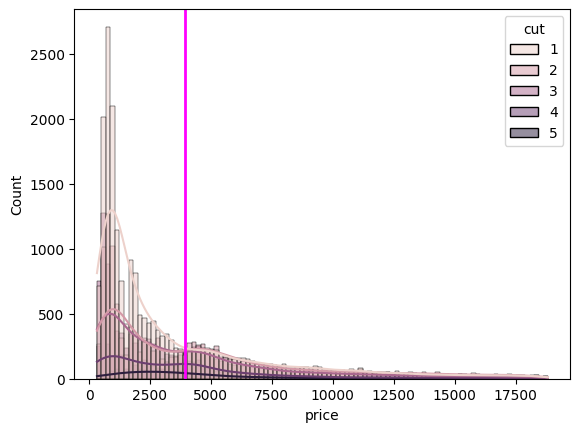

In [32]:
sns.histplot(df, x="price", kde=True, color="green", hue="cut", bins=100)
plt.axvline(df["price"].mean(), color="magenta", linewidth=2)

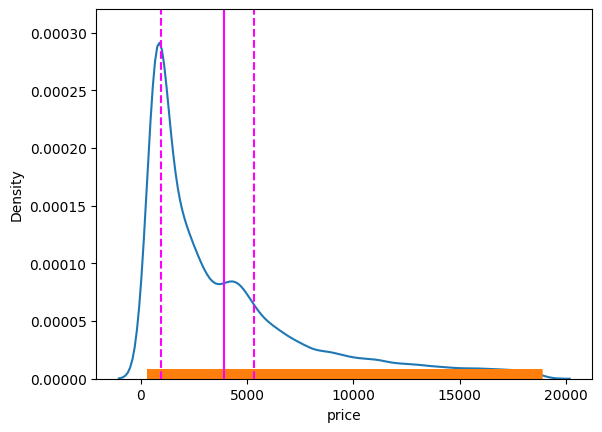

In [33]:
sns.kdeplot(df, x="price")
sns.rugplot(df, x="price")
plt.axvline(df["price"].mean(), color="magenta")
plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
plt.axvline(df['price'].quantile(0.75), color='magenta', linestyle='--')

# Boxplot

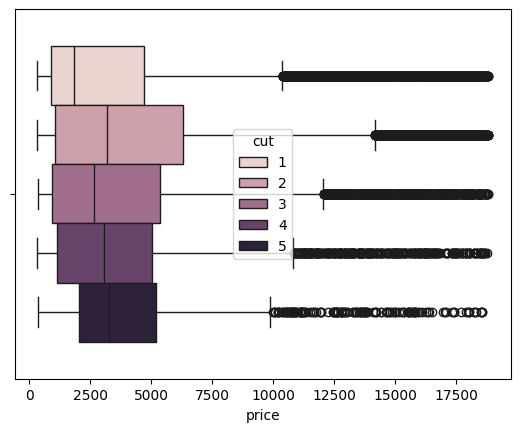

In [34]:
sns.boxplot(df, x=df["price"], hue=df["cut"])  
plt.show()

# Countplot

<Axes: xlabel='price', ylabel='count'>

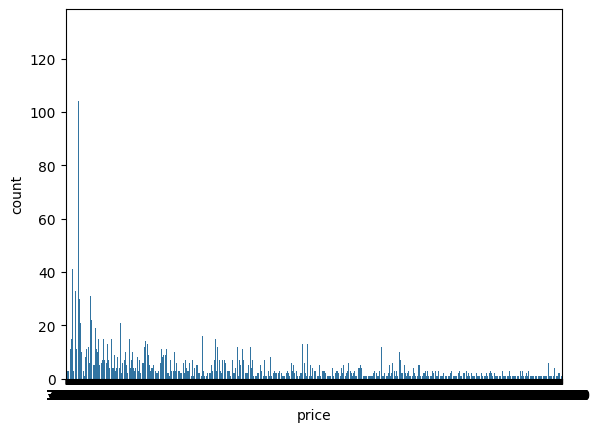

In [35]:
sns.countplot(df, x="price")

## Bivariantes y Multivariantes

# Scatterplot

<Axes: xlabel='price', ylabel='depth'>

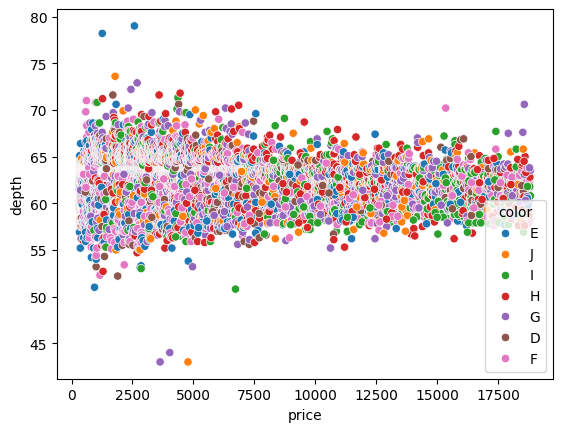

In [36]:
sns.scatterplot(df, x="price", y="depth", hue="color")

<Axes: xlabel='price', ylabel='depth'>

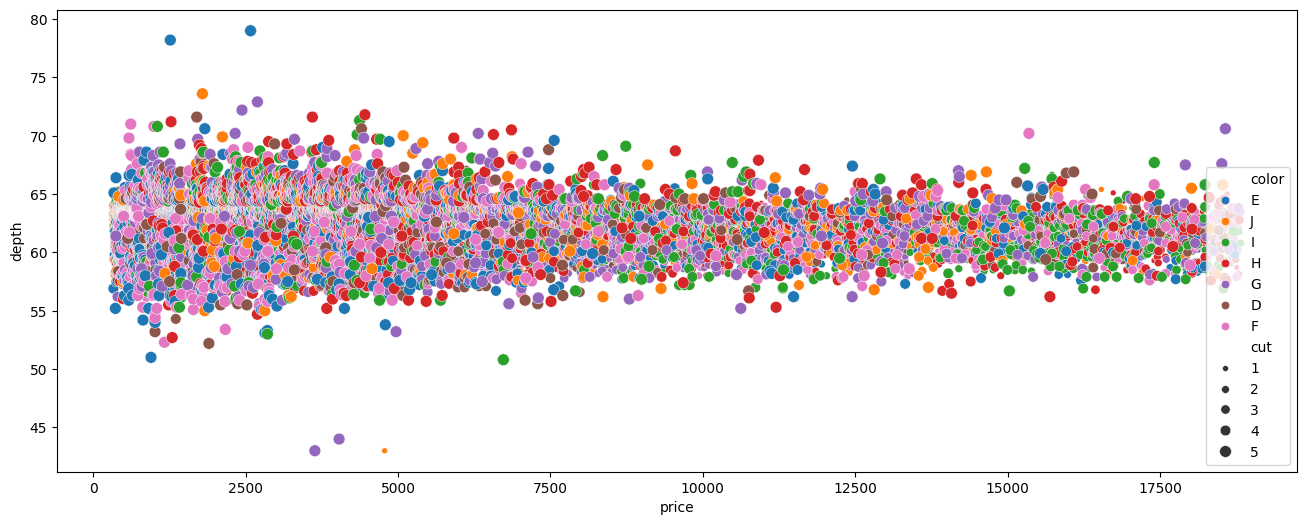

In [37]:
plt.figure(figsize=(16,6))
sns.scatterplot(df, x='price', y='depth', hue='color', size='cut')

C:\Users\varso\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


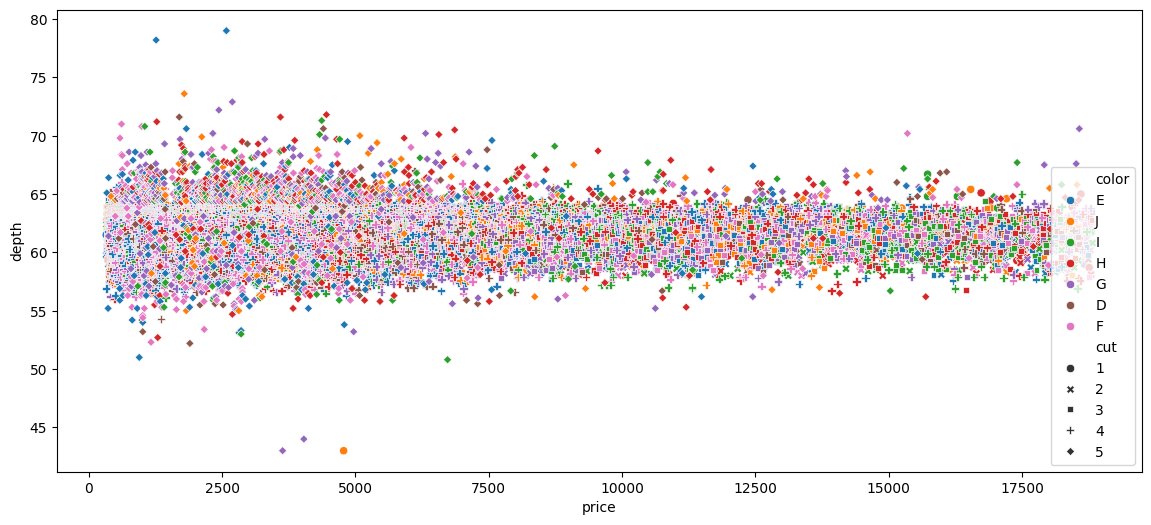

In [38]:
plt.figure(figsize=(14,6))
sns.scatterplot(df, x="price", y="depth", hue="color", style="cut")
plt.show()

<Axes: xlabel='volumen', ylabel='price'>

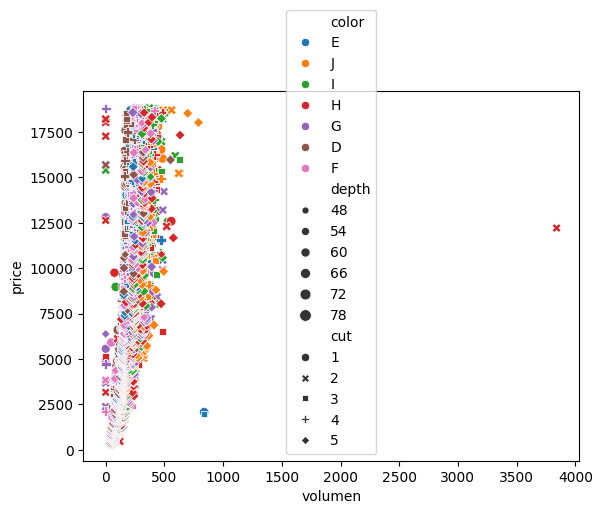

In [39]:
sns.scatterplot(df, x="volumen", y="price",style="cut", size="depth",hue="color")

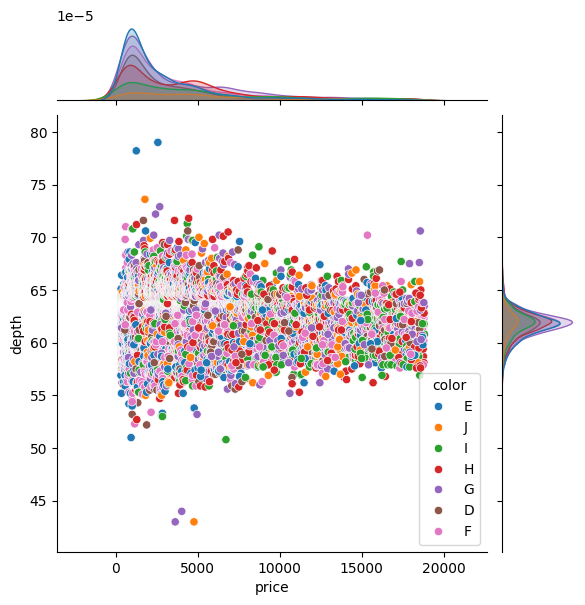

In [40]:

sns.jointplot(df, x="price", y="depth", hue="color")
plt.show()

## Correlación

* Calculo con Pandas

In [41]:
correlacion = df_encoded.corr()
correlacion

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028219,0.181590,0.921491,0.975086,0.951655,0.953376,0.091842,0.034193,-0.163594,...,0.161306,0.180053,0.120983,-0.114451,0.062722,0.267480,-0.063124,-0.038931,-0.167575,-0.137028
depth,0.028219,1.000000,-0.295785,-0.010575,-0.025312,-0.029294,0.094947,0.280657,0.136114,-0.022754,...,0.022621,0.022543,0.081135,-0.030881,0.040985,0.007202,-0.024280,-0.009455,-0.023477,-0.019243
table,0.181590,-0.295785,1.000000,0.127050,0.195315,0.183686,0.150890,0.125336,0.175183,-0.549520,...,0.017907,0.037259,0.044719,-0.078762,0.051953,0.095356,-0.026884,-0.009653,-0.069096,-0.062265
price,0.921491,-0.010575,0.127050,1.000000,0.884353,0.865397,0.861183,0.018745,-0.000280,-0.097002,...,0.096907,0.081739,-0.000245,-0.049586,0.008881,0.128473,-0.009876,-0.001071,-0.095254,-0.052359
x,0.975086,-0.025312,0.195315,0.884353,1.000000,0.974646,0.970749,0.080592,0.030354,-0.162615,...,0.146388,0.164662,0.108363,-0.125974,0.079263,0.270835,-0.059899,-0.035550,-0.185251,-0.147126
y,0.951655,-0.029294,0.183686,0.865397,0.974646,1.000000,0.951954,0.068832,0.032201,-0.153070,...,0.142780,0.160794,0.100745,-0.120798,0.076069,0.263283,-0.056500,-0.035936,-0.179268,-0.141617
z,0.953376,0.094947,0.150890,0.861183,0.970749,0.951954,1.000000,0.110371,0.045175,-0.158612,...,0.145146,0.164223,0.111916,-0.125246,0.081066,0.263156,-0.058544,-0.036332,-0.182398,-0.144741
cut_Fair,0.091842,0.280657,0.125336,0.018745,0.080592,0.068832,0.110371,1.000000,-0.055482,-0.143089,...,0.004781,0.017257,0.175852,-0.027022,0.004571,0.055506,-0.022445,-0.027259,-0.039920,-0.030703
cut_Good,0.034193,0.136114,0.175183,-0.000280,0.030354,0.032201,0.045175,-0.055482,1.000000,-0.258038,...,0.006207,0.014977,0.015844,-0.033046,0.056058,0.041970,-0.017280,-0.021050,-0.037564,-0.038627
cut_Ideal,-0.163594,-0.022754,-0.549520,-0.097002,-0.162615,-0.153070,-0.158612,-0.143089,-0.258038,1.000000,...,-0.009327,-0.038507,-0.048803,0.104971,-0.082885,-0.108274,0.034258,0.015664,0.088332,0.075612


# Gráfica con Seaborn

<Axes: >

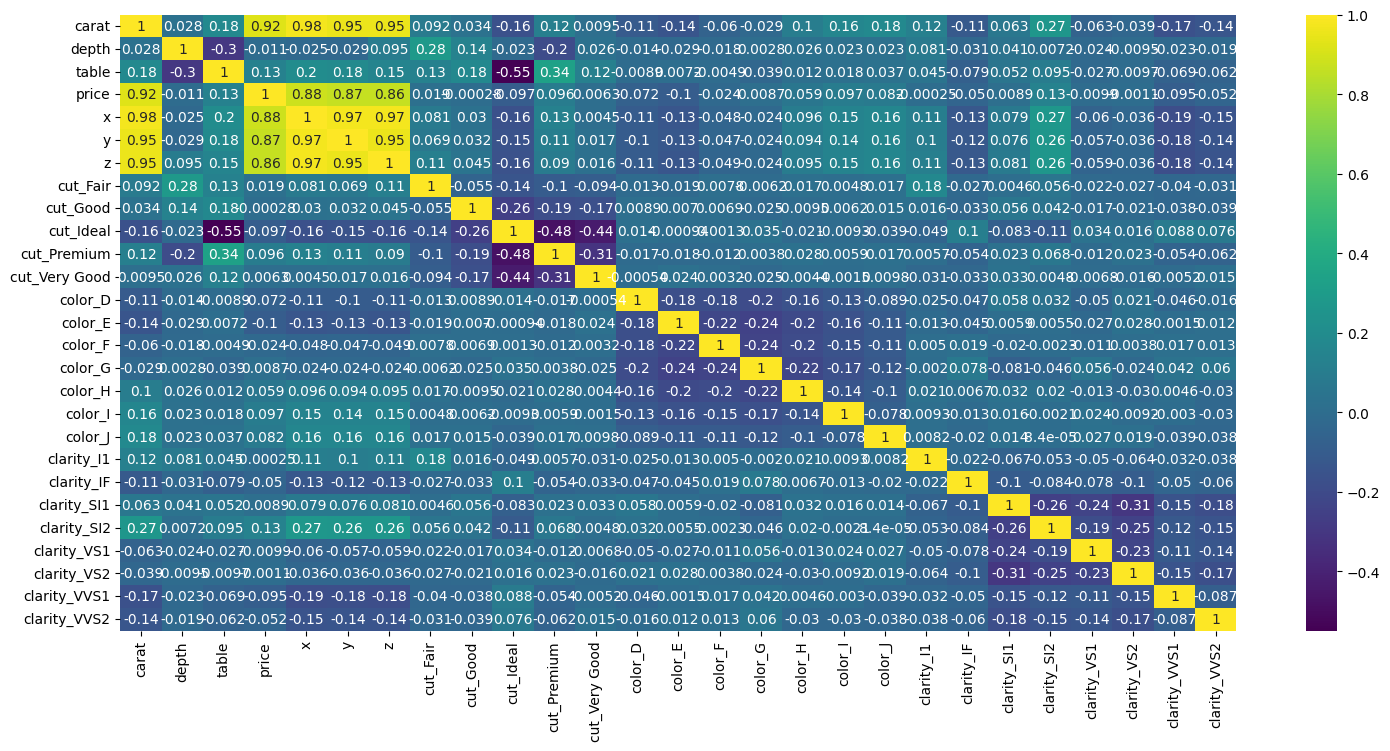

In [42]:
plt.figure(figsize=(18,8))
sns.heatmap(correlacion, annot=True, cmap="viridis")

<Axes: >

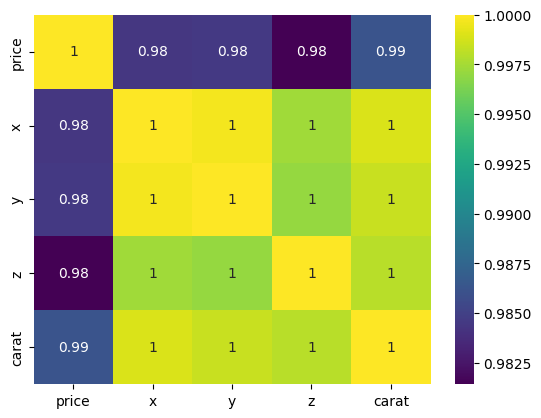

In [43]:
sns.heatmap(correlacion[["price", "x", "y", "z", "carat"]].corr(), annot=True, cmap="viridis") 

# Correlación con barras

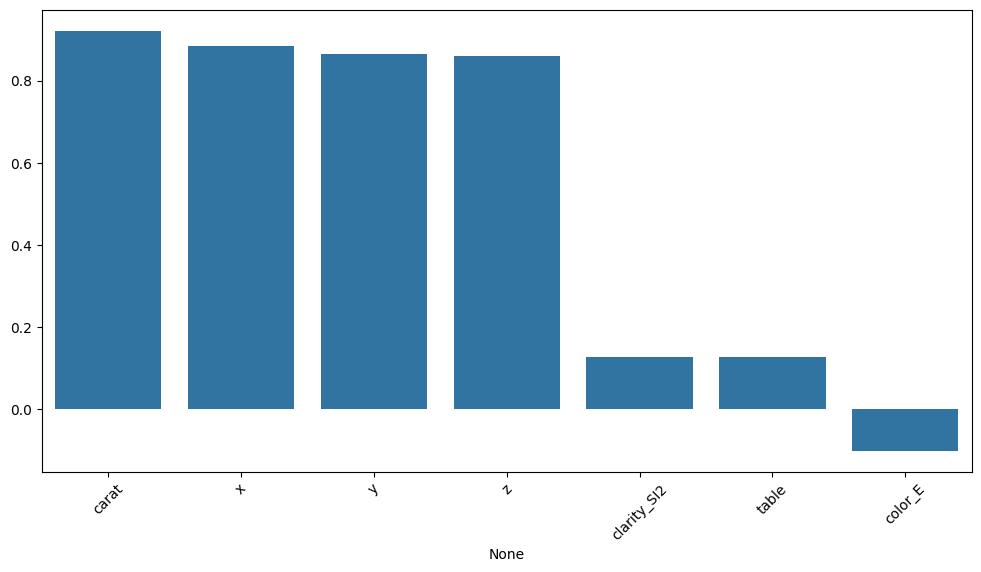

In [44]:

plt.figure(figsize=(12,6))

correlaciones = df_encoded.corr()['price'].drop('price')

# Opcional: Filtrar correlaciones bajas, no las queremos
filtro = (correlaciones > 0.1) | (correlaciones < -0.1) 
filtro_correlacion =correlaciones[filtro]
filtro_correlacion

# ordenar desc
filtro_correlacion.sort_values(ascending=False, inplace=True)

# gráfico de barras
sns.barplot(x=filtro_correlacion.index, y=filtro_correlacion.values)
plt.xticks(rotation=45);

# Conbinación con filtros hue, style

<Figure size 4000x600 with 0 Axes>

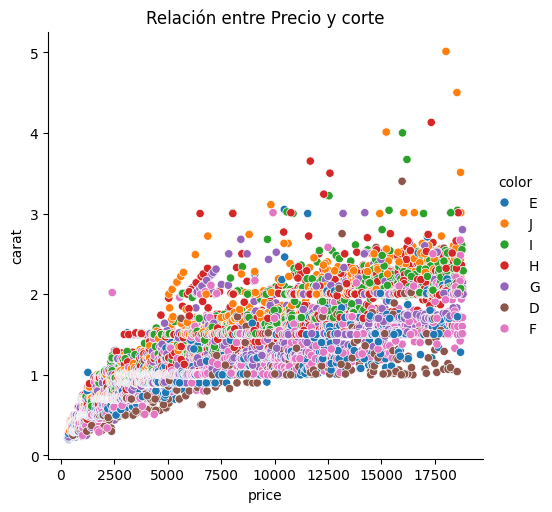

In [45]:
plt.figure(figsize=(40,6))

sns.relplot(data=df, x='price', y='carat', hue='color', kind='scatter')

# Mostrar gráfico
plt.title('Relación entre Precio y corte')
plt.show()

## Outliers

* Calculo Q1, Q3 y el IQR

In [46]:
# Calculo Q1, Q3 y el IQR

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

* Calculo los límites de Tukey

In [47]:
# Calculo los límites de Tukey
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

* Identificar outliers

In [48]:
# Identificar outliers
outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]

* Filtrar los datos para eliminar los outliers

In [49]:
# Filtrar los datos para eliminar los outliers
filtered_df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

* Visualización con un boxplot

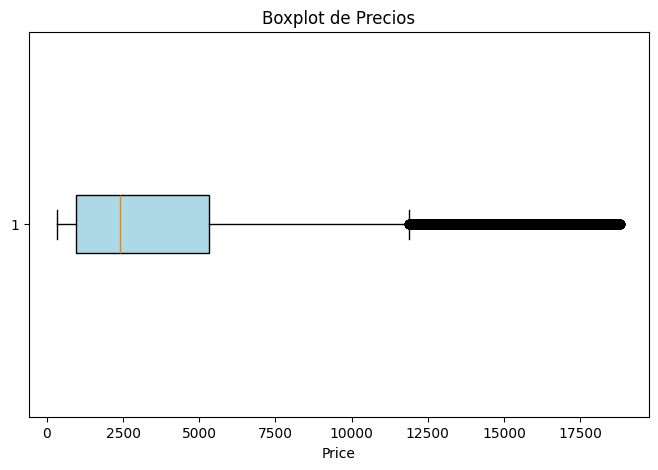

In [50]:
# Visualización con un boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Precios')
plt.xlabel('Price')
plt.show()

* Imprimir resultados

In [51]:
# Imprimir resultados
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {lower_limit}")
print(f"Límite superior: {upper_limit}")
print(f"Outliers detectados:\n{outliers}")

Q1: 950.0
Q3: 5324.0
IQR: 4374.0
Límite inferior: -5611.0
Límite superior: 11885.0
Outliers detectados:
       carat  cut color clarity  depth  table  total_suma_iva  price.iva  \
23820   1.17    1     F    VVS1   62.1   57.0        14382.06    2496.06   
23821   2.08    1     I     SI2   62.0   56.0        14382.06    2496.06   
23823   1.09    1     F      IF   61.6   55.0        14384.48    2496.48   
23824   1.68    1     E     SI2   60.4   55.0        14384.48    2496.48   
23832   1.18    1     E    VVS2   61.5   57.0        14406.26    2500.26   
...      ...  ...   ...     ...    ...    ...             ...        ...   
27543   2.51    5     H     SI2   64.7   57.0        22152.68    3844.68   
27623   2.00    5     G     VS2   67.6   58.0        22403.15    3888.15   
27630   4.50    5     J      I1   65.8   58.0        22422.51    3891.51   
27643   2.02    5     H     VS2   64.5   57.0        22463.65    3898.65   
27646   2.01    5     G     SI1   70.6   64.0        22474.5

# Discretizar

In [54]:
rangos = [df["price"].min(),3000,7600, df["price"].max()]
label = ["Barato","Medio","Caro"] 
df["price_discret"] = pd.cut(df["price"], bins=rangos, labels=label)
df

,carat,cut,color,clarity,depth,table,total_suma_iva,price.iva,price,x,y,z,price_discount,volumen,price_discret,log_price,sqrt_price,scaled_price
0,0.23,1,E,SI2,61.5,55.0,394.46,68.46,326.0,3.95,3.98,2.43,293.4,38.202030,NaN,5.789960,18.055470,0.000000
11,0.23,1,J,VS1,62.8,56.0,411.40,71.40,340.0,3.93,3.90,2.46,306.0,37.704420,Barato,5.831882,18.439089,0.000757
13,0.31,1,J,SI2,62.2,54.0,416.24,72.24,344.0,4.35,4.37,2.71,309.6,51.515745,Barato,5.843544,18.547237,0.000973
16,0.30,1,I,SI2,62.0,54.0,421.08,73.08,348.0,4.31,4.34,2.68,313.2,50.130472,Barato,5.855072,18.654758,0.001189
28262,0.25,1,H,SI1,62.8,54.0,431.97,74.97,357.0,4.05,4.07,2.55,321.3,42.032925,Barato,5.880533,18.894444,0.001676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27543,2.51,5,H,SI2,64.7,57.0,22152.68,3844.68,18308.0,8.44,8.50,5.48,18308.0,393.135200,Caro,9.815148,135.307058,0.972158
27623,2.00,5,G,VS2,67.6,58.0,22403.15,3888.15,18515.0,7.65,7.61,5.16,18515.0,300.397140,Caro,9.826391,136.069835,0.983349
27630,4.50,5,J,I1,65.8,58.0,22422.51,3891.51,18531.0,10.23,10.16,6.72,18531.0,698.455296,Caro,9.827254,136.128616,0.984214
27643,2.02,5,H,VS2,64.5,57.0,22463.65,3898.65,18565.0,8.00,7.95,5.14,18565.0,326.904000,Caro,9.829087,136.253440,0.986052


## Distribuciones y escalados
* Creación de Curtosis
* Creación Asimetría
* Raíz cuadrada
* Escalado

Asimetría original: 1.6184
Curtosis original: 2.1779
Asimetría logarítmica: 0.11593584415340458
Curtosis logarítmica: -1.0966888600855633
Asimetría raíz cuadrada: 0.8443946378126599
Curtosis raíz cuadrada: -0.1100691464107939


C:\Users\varso\AppData\Local\Temp\ipykernel_19536\3290690260.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Set3')
C:\Users\varso\AppData\Local\Temp\ipykernel_19536\3290690260.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='log_price', data=df, palette='Set2')


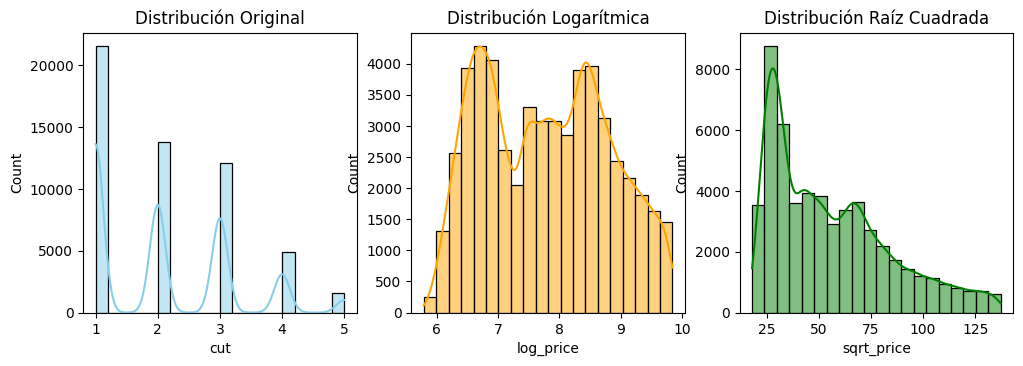

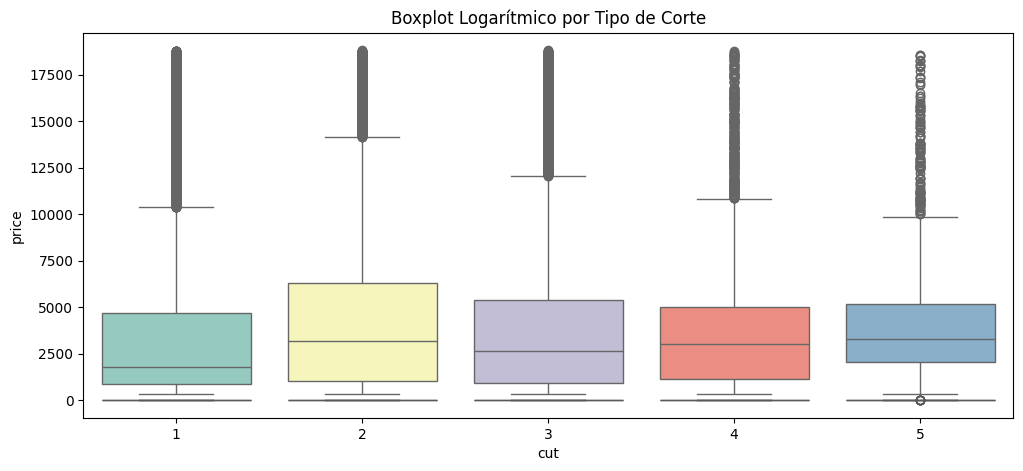

Precios escalados:
          price  scaled_price
0        326.0      0.000000
11       340.0      0.000757
13       344.0      0.000973
16       348.0      0.001189
28262    357.0      0.001676
...        ...           ...
27543  18308.0      0.972158
27623  18515.0      0.983349
27630  18531.0      0.984214
27643  18565.0      0.986052
27646  18574.0      0.986538

[53940 rows x 2 columns]


In [53]:



# Calculo asimetría y curtosis
original_asimetría = df['price'].skew().round(4)
original_curtosis = df['price'].kurtosis().round(4)

print(f"Asimetría original: {original_asimetría}")
print(f"Curtosis original: {original_curtosis}")

# Transformar datos
df['log_price'] = np.log1p(df['price'])  # log(1 + x) para manejar ceros
df['sqrt_price'] = np.sqrt(df['price'])

# Calcular asimetría y curtosis para datos transformados
log_asimetría = skew(df['log_price'])
log_curtosis = kurtosis(df['log_price'])

sqrt_asimetría = skew(df['sqrt_price'])
sqrt_curtosis = kurtosis(df['sqrt_price'])

print(f"Asimetría logarítmica: {log_asimetría}")
print(f"Curtosis logarítmica: {log_curtosis}")
print(f"Asimetría raíz cuadrada: {sqrt_asimetría}")
print(f"Curtosis raíz cuadrada: {sqrt_curtosis}")

# Visualizar histogramas y boxplots
plt.figure(figsize=(12, 8))

# Histograma original
plt.subplot(2, 3, 1)
sns.histplot(df['cut'], kde=True, bins=20, color='skyblue')
plt.title('Distribución Original')

# Histograma logarítmico
plt.subplot(2, 3, 2)
sns.histplot(df['log_price'], kde=True, bins=20, color='orange')
plt.title('Distribución Logarítmica')


# Histograma raíz cuadrada
plt.subplot(2, 3, 3)
sns.histplot(df['sqrt_price'], kde=True, bins=20, color='green')
plt.title('Distribución Raíz Cuadrada')

# Boxplot por tipo de corte
plt.figure(figsize=(12, 5))
sns.boxplot(x='cut', y='price', data=df, palette='Set3')
plt.title('Boxplot Original por Tipo de Corte')

sns.boxplot(x='cut', y='log_price', data=df, palette='Set2')
plt.title('Boxplot Logarítmico por Tipo de Corte')
plt.show()

# Escalado (opcional)
from sklearn import  preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df['scaled_price'] = scaler.fit_transform(df[['price']])

print("Precios escalados:\n", df[['price', 'scaled_price']])